# Capstone Project - The Battle of the Neighborhoods 
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

This section provides an introduction and explains the business problem that will be solved as a subpart of Coursera Capstone project.

I would like to apply clustering algorithms to biggest European cities in order to see the similarities and differences between those cities. The data will be gathered from Foursquare developer platform. Foursquare provides info about many different type of shops in the city: e.g airport shops, types of restaurants, gyms etc. A clustering algorithm can provide some insight about which cities have similar social and economic lifestyle. Such an analysis would be fun and also readers can benefit from it (e.g. decide where to live next).

The previously used Toronto report will be a very good reference for this report. I just need to decide which cities to use and their (latitude, longitude) coordinates. I will try to use cities from all around Europe. The cities should be relativeley big and popular ones. As a choosing criteria, I can use city populations or their touristic attraction. To provide more meaningful/clear results, number of cities should not be very high or very low. Around 30 city on a map can show a clear pattern. Number of clusters will be decided during implementation. The result which provides a better conclusion will be used. Based on the result and its representation on the map, more cities can be added if needed. The implementation itself will provide more insight about this.

## Data <a name="data"></a>

#### City Coordinates

I decided to use city population as a metric for my city list and the list of most populated European cities can be easily reached from Wikipedia. In this section, these cities and their coordinates will be listed as dataframe and they will be shown on the map.

In [1]:
import numpy as np
import pandas as pd

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium

from IPython.display import Image

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\onur_\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.5.0-py_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [2]:
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits')[0]

In [3]:
df_cities = pd.DataFrame(columns=['city', 'latitude', 'longitude'])
df_cities['city'] = df['City']
df_cities['latitude'] = ''
df_cities['longitude'] = ''

In [4]:
df_cities

,city,latitude,longitude
0,Istanbul (entirely)[a],,
1,Moscow[b],,
2,London,,
3,Saint Petersburg,,
4,Berlin,,
5,Madrid,,
6,Kyiv,,
7,Rome,,
8,Paris,,
9,Minsk,,


City names look good except the first two. Since it is easy to change, I will change it manually. Also, just for curiosity, I would like to add Amsterdam as well.

In [5]:
df_cities['city'][0]='Istanbul'
df_cities['city'][1]='Moscow'
df_cities = df_cities.append({'city': 'Amsterdam'}, ignore_index=True)

In [6]:
df_cities

,city,latitude,longitude
0,Istanbul,,
1,Moscow,,
2,London,,
3,Saint Petersburg,,
4,Berlin,,
5,Madrid,,
6,Kyiv,,
7,Rome,,
8,Paris,,
9,Minsk,,


City names look good now. We can add their coordinates

In [7]:
for i in range(len(df_cities['city'])):
    address = df_cities['city'][i]
    geolocator = Nominatim(user_agent="europe_explorer")
    location = geolocator.geocode(address)
    df_cities['latitude'][i] = location.latitude
    df_cities['longitude'][i] = location.longitude

In [8]:
df_cities

,city,latitude,longitude
0,Istanbul,41.0096,28.9652
1,Moscow,55.7504,37.6175
2,London,51.5073,-0.127647
3,Saint Petersburg,59.9387,30.3162
4,Berlin,52.517,13.3889
5,Madrid,40.4167,-3.70358
6,Kyiv,50.45,30.5241
7,Rome,41.8933,12.4829
8,Paris,48.8567,2.35146
9,Minsk,53.9023,27.5619


In [9]:
geolocator = Nominatim(user_agent="europe_explorer")
location = geolocator.geocode('Sofia, Bulgaria')
print(location.latitude)
print(location.longitude)

42.6978634
23.3221789


In [10]:
df_cities['latitude'][23] = location.latitude
df_cities['longitude'][23] = location.longitude

In [11]:
df_cities

,city,latitude,longitude
0,Istanbul,41.0096,28.9652
1,Moscow,55.7504,37.6175
2,London,51.5073,-0.127647
3,Saint Petersburg,59.9387,30.3162
4,Berlin,52.517,13.3889
5,Madrid,40.4167,-3.70358
6,Kyiv,50.45,30.5241
7,Rome,41.8933,12.4829
8,Paris,48.8567,2.35146
9,Minsk,53.9023,27.5619


In [12]:

address = 'Europe'
geolocator = Nominatim(user_agent="eu_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Europe are {}, {}.'.format(latitude, longitude))

# create map of Europe using latitude and longitude values
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(df_cities['latitude'], df_cities['longitude'], df_cities['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

The geograpical coordinate of Europe are 51.0, 10.0.


Github does not support Leaflet, therefore I add SS of the resulting map.

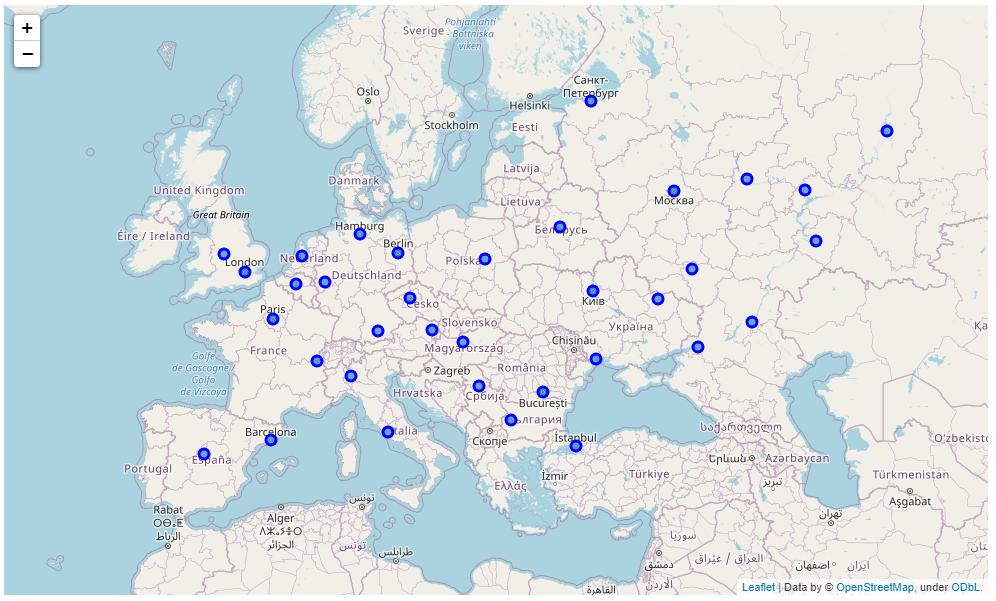

In [13]:
Image("europe.png")

The samples look equally distributed and suitable for clustering. Therefore, I will continue with this dataset.

#### Foursquare

In [14]:
CLIENT_ID = 'VSQJMU45QOFNTKUQO2BUD2ULM0RKGLFKB3ICDJZQ5NYTLVMC' # your Foursquare ID
CLIENT_SECRET = 'LXTSH02JQ52XPF3YWYSBXKHYEZVLGWMFIPIREQKOREYFW302' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius


In [15]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Write function to get surrounding information of cities from Foursquare

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius, categoryId):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'city latitude', 
                  'city longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get frequency of shop type occurence in each neighborhood. For the first 4 cities I will consider 25 km as radius of the city while for the rest I will consider 10km. This seperation is due to their big difference in population (e.g. Istanbul is 15+M while Odessa is only 1M).

In [17]:
europe_venues_big_city = getNearbyVenues(names=df_cities['city'][0:4],
                                   latitudes=df_cities['latitude'][0:4],
                                   longitudes=df_cities['longitude'][0:4],
                                   radius = 25000,
                                   categoryId = "4bf58dd8d48988d181941735"
                                  )

europe_venues_small_city = getNearbyVenues(names=df_cities['city'][4:],
                                   latitudes=df_cities['latitude'][4:],
                                   longitudes=df_cities['longitude'][4:],
                                   radius = 10000,
                                   categoryId = "4bf58dd8d48988d181941735"
                                  )


In [18]:
europe_venues_big_city

,city,city latitude,city longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Istanbul,41.009633,28.965165,Süleymaniye Külliyesi,41.016032,28.963789,Museum
1,Istanbul,41.009633,28.965165,Ahmet Hamdi Tanpınar Edebiyat Müze Kütüphanesi,41.010931,28.978549,Library
2,Istanbul,41.009633,28.965165,Topkapı Sarayı Müzesi,41.010629,28.984605,History Museum
3,Istanbul,41.009633,28.965165,Türkiye İş Bankası Müzesi,41.016155,28.972520,History Museum
4,Istanbul,41.009633,28.965165,Ayasofya Müzesi Padişah Türbeleri,41.007852,28.979509,Shrine
...,...,...,...,...,...,...,...
395,Saint Petersburg,59.938732,30.316229,Комендантский дом,59.949617,30.316880,History Museum
396,Saint Petersburg,59.938732,30.316229,Сладкий Музей,59.936274,30.314901,Museum
397,Saint Petersburg,59.938732,30.316229,Shadow Museum (Музей теней),59.940030,30.323701,Museum
398,Saint Petersburg,59.938732,30.316229,Музей-квартира Елизаровых,59.965909,30.294640,History Museum


In [19]:
europe_venues_small_city

,city,city latitude,city longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berlin,52.517037,13.388860,Tränenpalast,52.520854,13.387162,Historic Site
1,Berlin,52.517037,13.388860,Deutscher Dom,52.512747,13.392656,History Museum
2,Berlin,52.517037,13.388860,Deutsches Historisches Museum,52.517788,13.396948,History Museum
3,Berlin,52.517037,13.388860,Neues Museum,52.520158,13.397838,History Museum
4,Berlin,52.517037,13.388860,Pergamonmuseum,52.520843,13.396395,History Museum
...,...,...,...,...,...,...,...
1630,Amsterdam,52.372760,4.893604,Collectiecentrum,52.413585,4.872072,History Museum
1631,Amsterdam,52.372760,4.893604,Amsterdam dungeon shop,52.338258,4.816292,History Museum
1632,Amsterdam,52.372760,4.893604,Natuurmuseum E. Heimans,52.441002,4.846913,Museum
1633,Amsterdam,52.372760,4.893604,Museum Jan van der Togt,52.302546,4.846737,Art Museum


In [20]:
europe_venues = europe_venues_big_city.append(europe_venues_small_city)
europe_venues

,city,city latitude,city longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Istanbul,41.009633,28.965165,Süleymaniye Külliyesi,41.016032,28.963789,Museum
1,Istanbul,41.009633,28.965165,Ahmet Hamdi Tanpınar Edebiyat Müze Kütüphanesi,41.010931,28.978549,Library
2,Istanbul,41.009633,28.965165,Topkapı Sarayı Müzesi,41.010629,28.984605,History Museum
3,Istanbul,41.009633,28.965165,Türkiye İş Bankası Müzesi,41.016155,28.972520,History Museum
4,Istanbul,41.009633,28.965165,Ayasofya Müzesi Padişah Türbeleri,41.007852,28.979509,Shrine
...,...,...,...,...,...,...,...
1630,Amsterdam,52.372760,4.893604,Collectiecentrum,52.413585,4.872072,History Museum
1631,Amsterdam,52.372760,4.893604,Amsterdam dungeon shop,52.338258,4.816292,History Museum
1632,Amsterdam,52.372760,4.893604,Natuurmuseum E. Heimans,52.441002,4.846913,Museum
1633,Amsterdam,52.372760,4.893604,Museum Jan van der Togt,52.302546,4.846737,Art Museum


In [21]:
# one hot encoding
europe_onehot = pd.get_dummies(europe_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
europe_onehot['city'] = europe_venues['city'] 

# move neighborhood column to the first column
fixed_columns = [europe_onehot.columns[-1]] + list(europe_onehot.columns[:-1])
europe_onehot = europe_onehot[fixed_columns]
europe_grouped = europe_onehot.groupby('city').mean().reset_index()
europe_grouped

,city,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Auditorium,Auto Dealership,Boat or Ferry,Brewery,...,Sculpture Garden,Shopping Mall,Shrine,Stables,Synagogue,Temple,Theater,Tourist Information Center,Train Station,Winery
0,Amsterdam,0.000000,0.00000,0.010000,0.180000,0.00,0.000000,0.000000,0.010000,0.000000,...,0.000000,0.000000,0.00,0.01,0.00000,0.000000,0.000000,0.00,0.000000,0.00
1,Barcelona,0.000000,0.00000,0.052083,0.208333,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00
2,Belgrade,0.000000,0.00000,0.104167,0.041667,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00
3,Berlin,0.000000,0.00000,0.000000,0.280000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.01,0.000000,0.00
4,Birmingham,0.000000,0.00000,0.125000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00
5,Brussels,0.000000,0.00000,0.010417,0.333333,0.00,0.000000,0.000000,0.000000,0.020833,...,0.000000,0.010417,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00
6,Bucharest,0.000000,0.00000,0.000000,0.285714,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00
7,Budapest,0.000000,0.01087,0.021739,0.184783,0.00,0.000000,0.000000,0.000000,0.000000,...,0.010870,0.000000,0.00,0.00,0.01087,0.000000,0.000000,0.00,0.000000,0.00
8,Cologne,0.000000,0.00000,0.000000,0.280000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00
9,Hamburg,0.000000,0.00000,0.042553,0.170213,0.00,0.000000,0.000000,0.042553,0.000000,...,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00


Note that number of cities is one lower, because we couldnt get any information for Perm/Russia. Let's exlude it from our analysis.

## Methodology <a name="methodology"></a>

In this project I will direct my efforts on detecting clusters of big European cities which have similar characteristics. In the introduction section, I proposed to get all Foursquare data. In the Data gathering section, I decided the list of the cities and relevant Foursquare data. In this section, I realized that getting all Foursquare data for all these cities would require too many Foursquare calls, which is not allowed by my current developer subscription. Therefore, I decided to limit my focus with only Museums. The type of museums can represent alot about the culture of the city (e.g. history museums for older cities, science museum for more modern cities). 

In the following Analysis section, I will apply clustering algorithms and I will try to seperate the cities with different characteristics. In the results and discussion section, I will provide the results I gathered with a good visualization. In the end, there is conclusion section in which I will summarize my findings and finish the report.

## Analysis <a name="analysis"></a>

Part of the analysis is already done in the previous sections. For example during data gathering, it was decided to limit the investigation with the Museum data. Also, the radius of city is determined considering the city population. These analysis are given in Data section because their results had effect on the data we gather. In this section, I will provide the application of the main clustering algorithm. I use k-means clustering, since it is easy to implement, fast and accurate for battle of neighborhood concepts.

#### Prepare for Analysis

In [22]:
europe_grouped_clustering = europe_grouped.drop('city', 1)
df_cities=df_cities.drop([31]) #Perm does not have Foursquare data as explained at the end of Data section
df_cities=df_cities.reset_index(drop=True)
df_cities

,city,latitude,longitude
0,Istanbul,41.0096,28.9652
1,Moscow,55.7504,37.6175
2,London,51.5073,-0.127647
3,Saint Petersburg,59.9387,30.3162
4,Berlin,52.517,13.3889
5,Madrid,40.4167,-3.70358
6,Kyiv,50.45,30.5241
7,Rome,41.8933,12.4829
8,Paris,48.8567,2.35146
9,Minsk,53.9023,27.5619


In [23]:
def assign_labels(labels, dataframe):
    dataframe['labels'] = labels#kmeans_2.labels_
    dataframe
    for i in range(len(dataframe['city'])):
        for j in range(len(dataframe['city'])):
            if europe_grouped['city'][i] == dataframe['city'][j]:
                dataframe['labels'][j] = labels[i]

In [24]:
my_colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]

def paint_clusters(df_with_labels):
    address = 'Europe'
    geolocator = Nominatim(user_agent="eu_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Europe are {}, {}.'.format(latitude, longitude))

    # create map of Europe using latitude and longitude values
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(df_with_labels['latitude'], df_with_labels['longitude'], df_with_labels['city'], df_with_labels['labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=my_colors[cluster],
            fill=True,
            fill_color=my_colors[cluster],
            fill_opacity=0.7).add_to(map_clusters)

    return(map_clusters)

#### Apply k-means clustering

2 clusters:

In [25]:
# set number of clusters
kclusters = 2
# run k-means clustering
kmeans_2 = KMeans(n_clusters=kclusters, random_state=0).fit(europe_grouped_clustering)

#show labels
kmeans_2.labels_

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [26]:
assign_labels(kmeans_2.labels_, df_cities)

<ipython-input-23-2c7a35699aa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['labels'][j] = labels[i]


In [27]:
paint_clusters(df_cities)

The geograpical coordinate of Europe are 51.0, 10.0.


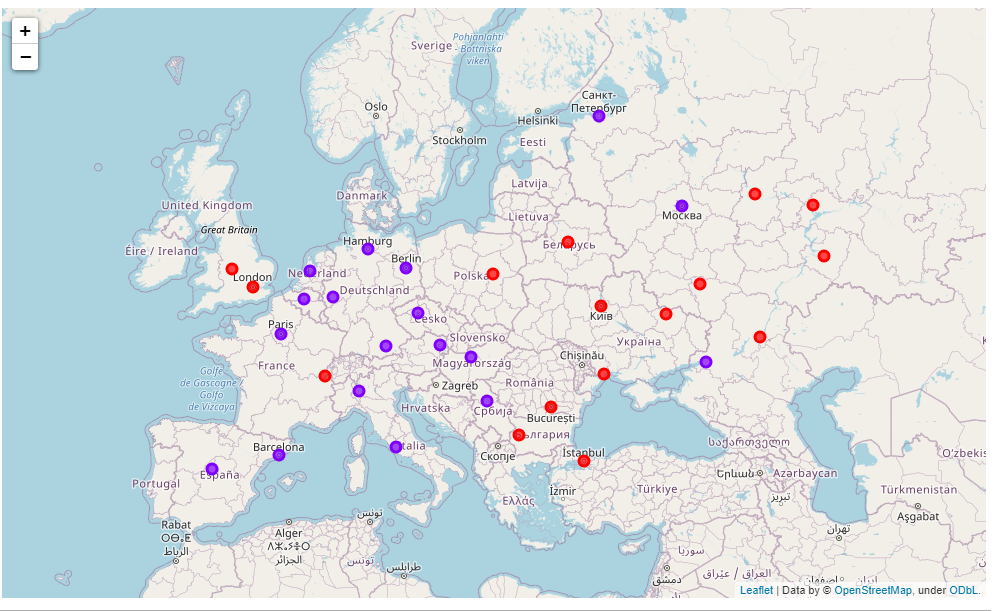

In [28]:
Image("2clusters.png")

3 clusters:

In [29]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans_3 = KMeans(n_clusters=kclusters, random_state=0).fit(europe_grouped_clustering)

#show labels
kmeans_3.labels_

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2])

In [30]:
assign_labels(kmeans_3.labels_, df_cities)

<ipython-input-23-2c7a35699aa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['labels'][j] = labels[i]


In [31]:
paint_clusters(df_cities)

The geograpical coordinate of Europe are 51.0, 10.0.


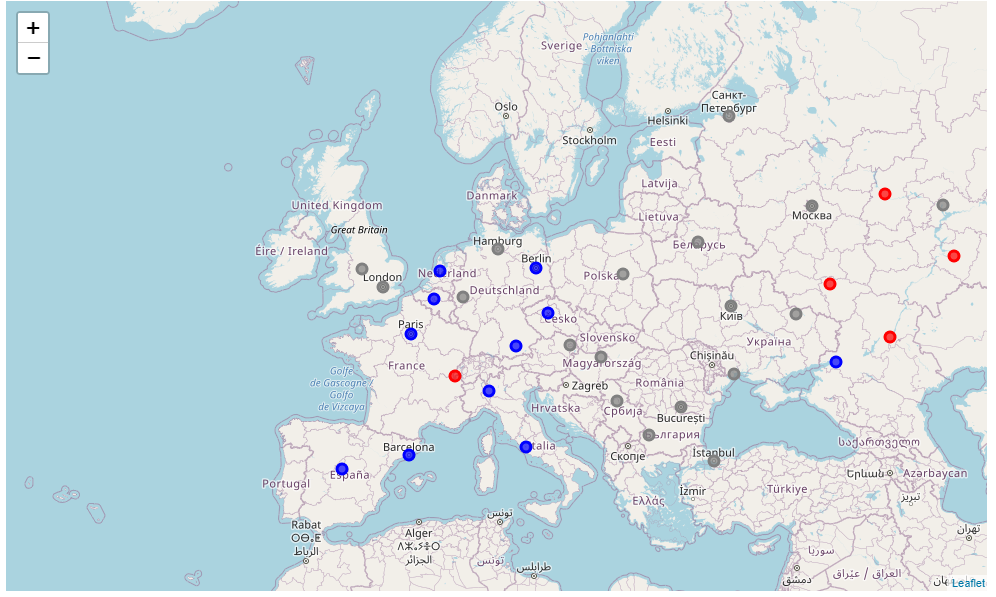

In [39]:
Image("3clusters.png")

4 clusters:

In [32]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans_4 = KMeans(n_clusters=kclusters, random_state=0).fit(europe_grouped_clustering)

#show labels
kmeans_4.labels_

array([1, 1, 1, 3, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 2, 1,
       3, 1, 3, 3, 0, 2, 0, 2, 1, 2, 2, 0])

In [33]:
assign_labels(kmeans_4.labels_, df_cities)
paint_clusters(df_cities)

<ipython-input-23-2c7a35699aa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['labels'][j] = labels[i]


The geograpical coordinate of Europe are 51.0, 10.0.


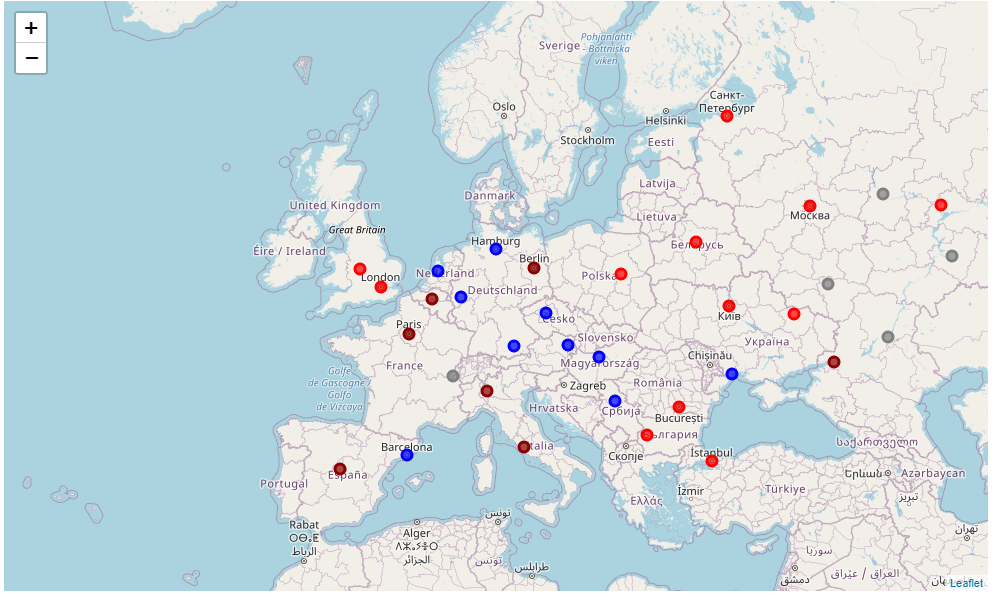

In [40]:
Image("4clusters.png")

5 clusters:

In [34]:
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans_5 = KMeans(n_clusters=kclusters, random_state=0).fit(europe_grouped_clustering)

#show labels
kmeans_5.labels_

array([1, 1, 1, 3, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 2, 1,
       3, 1, 3, 3, 0, 2, 0, 4, 1, 2, 2, 0])

In [35]:
assign_labels(kmeans_5.labels_, df_cities)
paint_clusters(df_cities)

<ipython-input-23-2c7a35699aa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['labels'][j] = labels[i]


The geograpical coordinate of Europe are 51.0, 10.0.


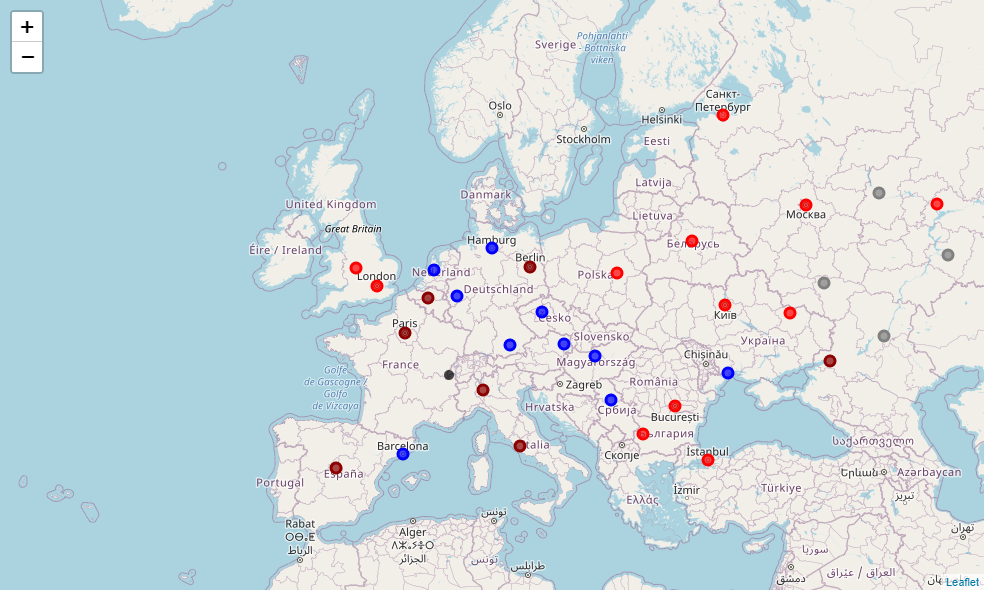

In [41]:
Image("5clusters.png")

6 clusters:

In [37]:
# set number of clusters
kclusters = 6
# run k-means clustering
kmeans_6 = KMeans(n_clusters=kclusters, random_state=0).fit(europe_grouped_clustering)

#show labels
kmeans_6.labels_

array([5, 5, 5, 2, 4, 2, 4, 0, 0, 0, 4, 4, 4, 4, 4, 2, 2, 4, 0, 5, 1, 0,
       2, 0, 2, 2, 0, 4, 4, 3, 0, 1, 1, 4])

In [38]:
assign_labels(kmeans_6.labels_, df_cities)
paint_clusters(df_cities)

<ipython-input-23-2c7a35699aa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['labels'][j] = labels[i]


The geograpical coordinate of Europe are 51.0, 10.0.


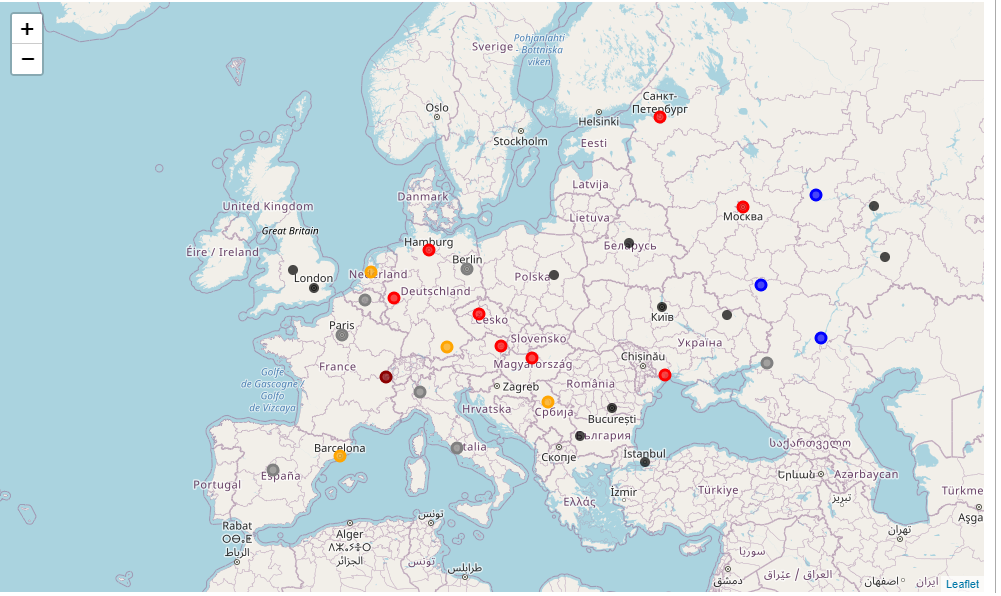

In [42]:
Image("6clusters.png")

## Results and Discussion <a name="results"></a>

We have clusters from 2 to 6 for all European cities considering their museum data. Some interesting results are as follows:

-We have one outlier in east of France. It is always in a singled out category after 4 clusters. After some close analysis, I realized that it is actually wrong placement of city Ufa. Ufa is actually in Russia. I will ignore this sample. The reason it behaves different is because of that regions population. Since it is not a big city(due to wrong placement), it has different characteristics.

-We see that the characteristics of the museums change depending on geographic location. Usually the seperation is between east and west.

-We see that Istanbul and London shows always the same characteristics. This cannot always be explained by population, because Moscow and Saint-Petersburg have also 5M+ populations and they behave differently.

-We have same country samples for Russia, UK, Spain, Italy, Ukrain. We mostly see similar characteristics if cities belong to same country. Sometimes this does not apply for Russia because it has so many samples and big geography. Also, Barcelona and Madrid reflects some differences in Spain.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify differences between different museum types of biggest European cities. Foursquare and Wikipedia are used as data sources. Results are shown on map in Analysis section and explained in Results and Discussion section. The main result was that the museum type changes between Eastern and Western Europe. This also reflects cultural differences.

Further analysis can be also done using Restaurant types or nightlife. I believe the results I found was quite expected but still it is very much fun to verify it using data.